In [1]:
from google.colab import files

import platform, sys
python_version=platform.python_version()
from distutils.version import LooseVersion, StrictVersion

if ( LooseVersion(python_version) < LooseVersion("3.0.0")):
    print("Python3 is needed!");
    print("How to fix: Runtime/Change_runtime_type/Python 3");
    sys.exit()
    
try:
    from dolfin import *; from mshr import *
except ImportError as e:
    !apt-get install -y -qq software-properties-common python-software-properties module-init-tools
    !add-apt-repository -y ppa:fenics-packages/fenics
    !apt-get update -qq
    !apt install -y --no-install-recommends fenics
    from dolfin import *; from mshr import *
    
import matplotlib.pyplot as plt;
from IPython.display import clear_output, display; import time; import dolfin.common.plotting as fenicsplot 
import time

import os, sys, shutil

dolfin_version = dolfin.__version__
print ('dolfin version:', dolfin_version)

!rm -rf * # clean up all files
# Useful commands
# Remove an empty folder      : os.rmdir("my_results")
# Remove a folder with files  : shutil.rmtree("results")
# Make a folder               : os.mkdir("my_results")
# Runtime/Change_runtime_type/Python3

E: Package 'python-software-properties' has no installation candidate
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:7 http://ppa.launchpad.net/fenics-packages/fenics/ubuntu bionic InRelease [15.4 kB]
Get:9 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:13 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]


In [2]:
from fenics import *

In [3]:
from petsc4py import PETSc
from mpi4py import MPI


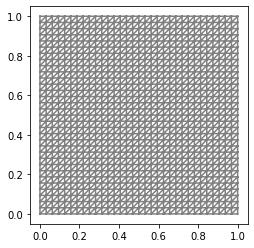

In [26]:


mesh=UnitSquareMesh(32,32)
plot(mesh)





In [5]:
V=FunctionSpace(mesh,"CG",1) #linear elements

Calling FFC just-in-time (JIT) compiler, this may take some time.


In [30]:
# Define Dirichlet boundary (x = 0 or x = 1)
def boundary(x):
    return x[0] < DOLFIN_EPS or x[0] > 1.0 - DOLFIN_EPS

    # Define boundary condition
u0 = Constant(0.0)
bc = DirichletBC(V, u0, boundary)

In [31]:
u=TrialFunction(V)
v=TestFunction(V)

In [32]:
f=Constant(-6.0)

In [33]:
a=(dot(grad(u),grad(v))+v*u)*dx
L=f*v*dx


0:00:00.004408


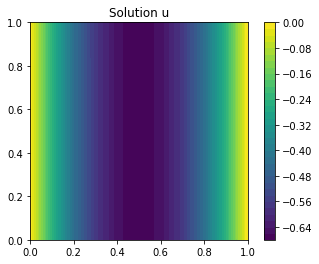

In [34]:
from datetime import datetime


# Compute solution
u = Function(V)

startTime = datetime.now()
solve(a == L, u, bc)

endTime = datetime.now()

# Plot solution and mesh
p=plot(u,  title="Solution u")

plt.colorbar(p)

#plot(mesh)
print(endTime-startTime)

In [21]:
u_true=u0

error_L2 = errornorm(u_true, u, 'L2')

# Compute maximum error at vertices
vertex_values_u0 = u0.compute_vertex_values(mesh)
vertex_values_u = u.compute_vertex_values(mesh)

In [22]:
import numpy as np
error_max = np.max(np.abs(vertex_values_u0 - vertex_values_u))

# Print errors
print('error_L2  =', error_L2)
print('error_max =', error_max)

error_L2  = 0.4936151355217702
error_max = 0.6795997203759114


In [35]:
u_D = Expression('cos(2*pi*x[0])*cos(2*pi*x[1])', degree=2)  
def boundary(x, on_boundary): 
    return on_boundary

bc1 = DirichletBC(V, u_D, boundary)  #u(x,y)=cos(2*pi*x) cos(2*pi*y)
f_1=1+8*pi*pi*u_D                   #f(x,y)=1+8.0*pi^2*u(x,y)

0:00:00.006206


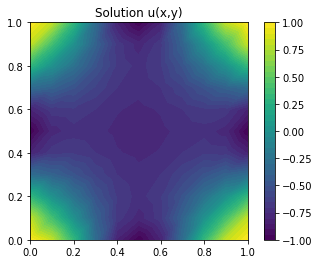

In [36]:
from datetime import datetime


# Compute solution
u = Function(V)

startTime = datetime.now()
solve(a == L, u, bc1)

endTime = datetime.now()

# Plot solution and mesh
p=plot(u,  title="Solution u(x,y)")

plt.colorbar(p)

#plot(mesh)
print(endTime-startTime)